In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

# تمیز کردن دیتاست 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# حذف کردن سه ستون اخر
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace =True)

In [8]:
df.sample(5)

,v1,v2
3874,ham,Okie but i scared u say i fat... Then u dun wa...
128,ham,HEY GIRL. HOW R U? HOPE U R WELL ME AN DEL R B...
3174,spam,UR GOING 2 BAHAMAS! CallFREEFONE 08081560665 a...
3248,ham,"Sorry, I can't help you on this."
2133,ham,Spoke with uncle john today. He strongly feels...


In [9]:
# بازنویسی نام ستون ها 
df.rename(columns = {'v1' : 'target', 'v2' : 'text'},inplace = True)
df.sample(5)

,target,text
1466,ham,Your account has been refilled successfully by...
1712,ham,o turns out i had stereo love on mi phone unde...
3712,ham,If i not meeting Ì_ all rite then i'll go home...
3649,ham,"We are hoping to get away by 7, from Langport...."
4020,ham,We have to pick rayan macleran there.


In [10]:
# ایجاد یک شیء 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
# تبدیل اسپم به یک و هم به صفر
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# null check
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# dup check
df.duplicated().sum()

403

In [15]:
# dup removage
df = df.drop_duplicates(keep='first')

In [16]:
# 2nd dup check
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

# EDA

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

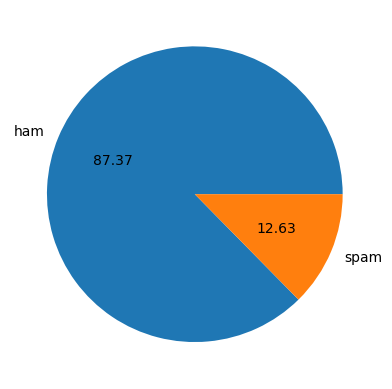

In [20]:
import matplotlib.pyplot as plt 
plt.pie(df['target'].value_counts(),labels=['ham', 'spam'],autopct='%0.2f')#make a pie chart from target values
plt.show() 

data is not balanced 

In [21]:
import spacy

In [22]:
df.loc[:, 'num_characters'] = df['text'].apply(len) # اضافه کردن ستون جدید که تعداد کاراکترها را می شمارد

/var/folders/6g/88x6m7b15ws2tmj8h6gk6m_00000gn/T/ipykernel_50234/202413025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'num_characters'] = df['text'].apply(len) # اضافه کردن ستون جدید که تعداد کاراکترها را می شمارد


In [23]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
nlp = spacy.load("en_core_web_sm") #load spacy english model

#tokenize function using spacy
def tokenize_text(text):
    doc = nlp(text)
    return [token.text for token in doc]

In [25]:
def tokenize_sentences(text):
    sentences = []
    doc = nlp(text)
    for sent in doc.sents:
        sentences.append(sent.text)
    return sentences

In [26]:
 #apply tokenize function and count number of words in new column named num_words
df.loc[:, 'num_words'] = df['text'].apply(tokenize_text).apply(len)
df.loc[:, 'num_sentences'] = df['text'].apply(tokenize_sentences).apply(len)

/var/folders/6g/88x6m7b15ws2tmj8h6gk6m_00000gn/T/ipykernel_50234/2201990111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'num_words'] = df['text'].apply(tokenize_text).apply(len)
/var/folders/6g/88x6m7b15ws2tmj8h6gk6m_00000gn/T/ipykernel_50234/2201990111.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'num_sentences'] = df['text'].apply(tokenize_sentences).apply(len)


In [27]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,3
3,0,U dun say so early hor... U c already then say...,49,13,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.339911,2.122848
std,58.236293,13.175170,1.481111
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,2.000000
75%,117.000000,26.000000,3.000000
max,910.000000,196.000000,31.000000


In [29]:
#ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.919176,1.982728
std,56.358207,13.224373,1.431233
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,2.000000
75%,90.000000,22.000000,2.000000
max,910.000000,196.000000,31.000000


In [30]:
#spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,28.165391,3.091884
std,30.137753,7.361204,1.458257
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,33.000000,4.000000
max,224.000000,49.000000,8.000000


In [31]:
import seaborn as sns



<Axes: xlabel='num_characters', ylabel='Count'>

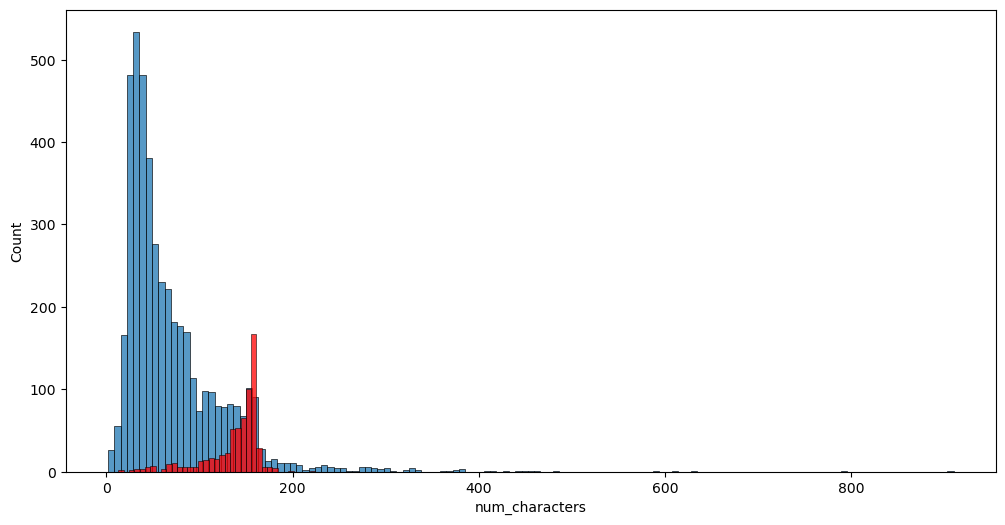

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters']) #ham
sns.histplot(df[df['target'] == 1]['num_characters'], color='red') #spam

<Axes: xlabel='num_words', ylabel='Count'>

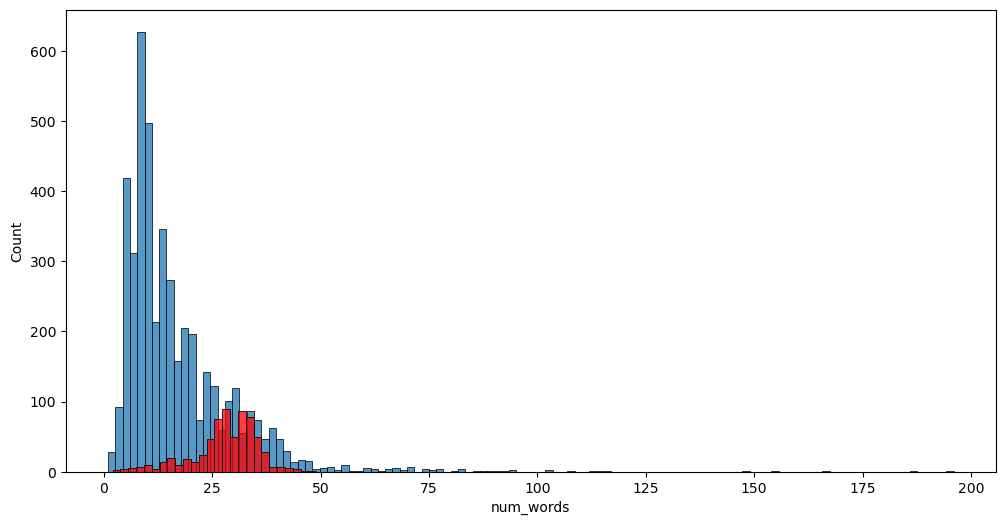

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words']) #ham
sns.histplot(df[df['target'] == 1]['num_words'], color='red') #spam

<Axes: xlabel='num_sentences', ylabel='Count'>

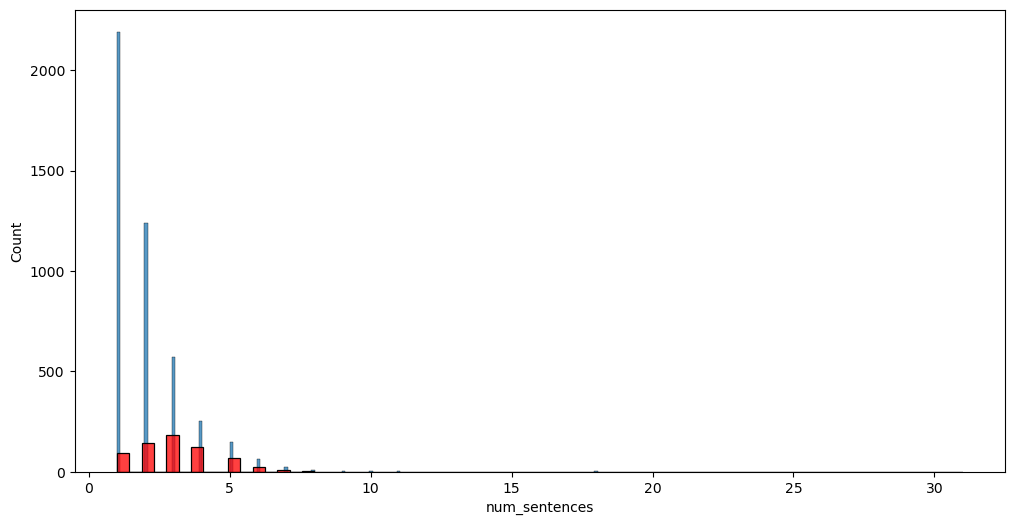

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences']) #ham
sns.histplot(df[df['target'] == 1]['num_sentences'], color='red') #spam

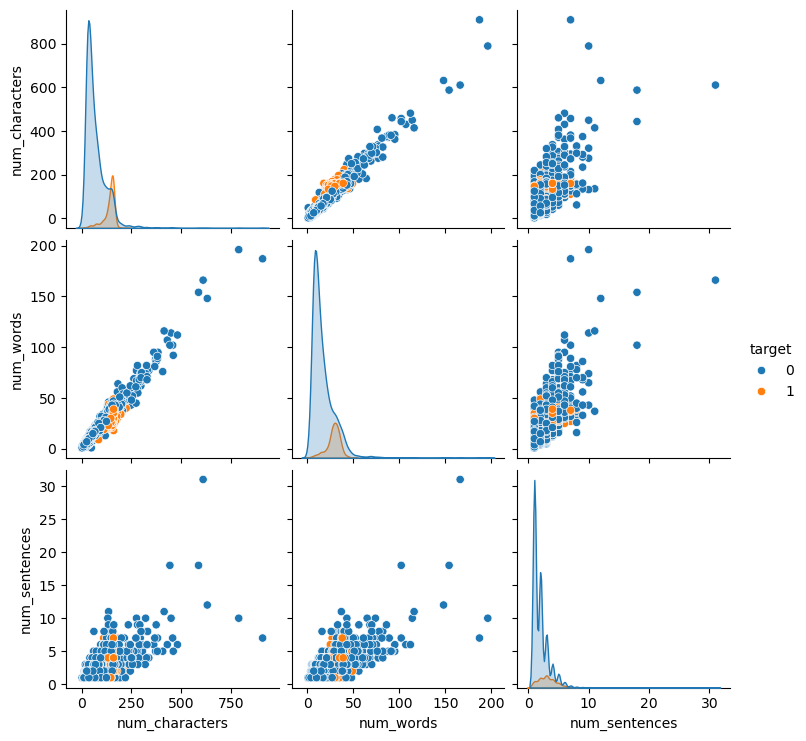

In [35]:
sns.pairplot(df,hue='target')

<Axes: >

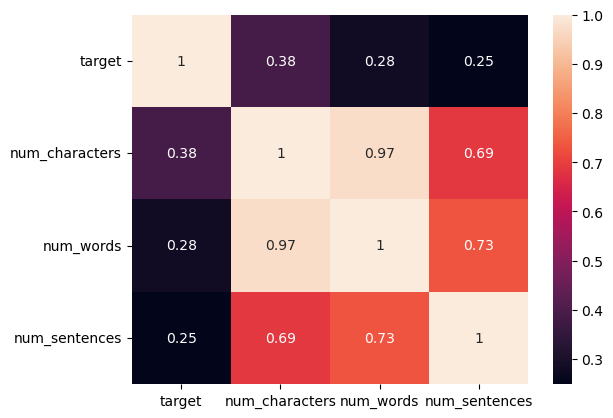

In [36]:
columns_to_include = ['target', 'num_characters', 'num_words', 'num_sentences']
sns.heatmap(df[columns_to_include].corr(),annot = True)

# Data Preprocessing
حروف کوچک و توکن بندی و حذف کاراکترهای خاص و حذف کلمات اضافی و علائم نگارشی

In [37]:
import string
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [38]:
sp = spacy.load('en_core_web_sm')
ps = PorterStemmer()

In [39]:
def transformer_text(text):
    
    text = text.lower()
    

    # Remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    text_without_punctuations = text.translate(translator)

    # Tokenize the text with nltk
    words = word_tokenize(text_without_punctuations)

    # Remove stop words using SpaCy
    all_stopwords = sp.Defaults.stop_words
    words_without_stopwords = [word for word in words if word not in all_stopwords]

    # Stemming the tokens with PorterStemmer
    tokens = [ps.stem(word) for word in words_without_stopwords]

    result = ' '.join(tokens)
    
    return result 


In [40]:
transformer_text('I loved the Yt lectures on Machine Learning. How about you?')

'love yt lectur machin learn'

In [41]:
df['transformed text'] = df['text'].apply(transformer_text)

/var/folders/6g/88x6m7b15ws2tmj8h6gk6m_00000gn/T/ipykernel_50234/3182176137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed text'] = df['text'].apply(transformer_text)


In [42]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3,jurong point crazi avail bugi n great world la...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,3,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,2,u dun earli hor u c
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think goe usf live


In [43]:
df['transformed text'][2]

'free entri 2 wkli comp win fa cup final tkt 21st 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18'

In [44]:
from wordcloud import WordCloud

In [45]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color = 'white')

In [46]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed text'].str.cat(sep=" "))

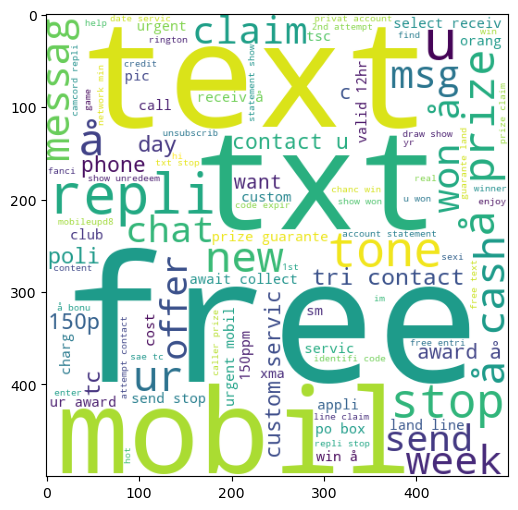

In [47]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [48]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed text'].str.cat(sep=" "))

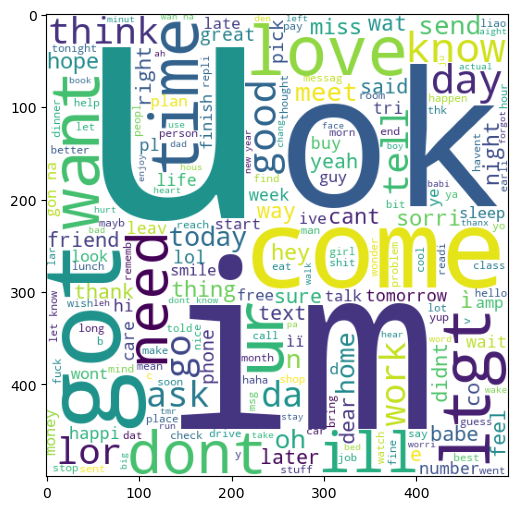

In [49]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [50]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [51]:
len(spam_corpus)

10105

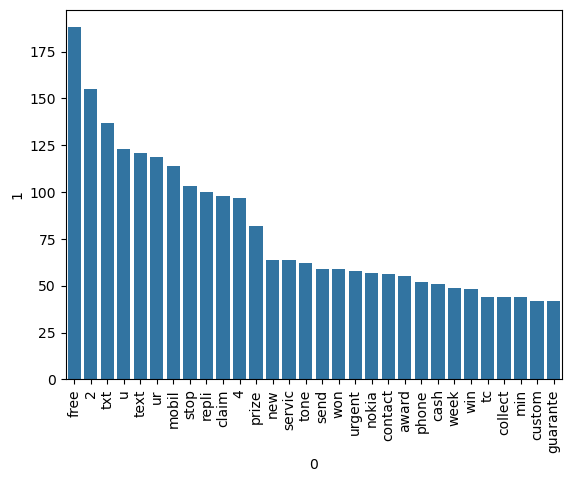

In [52]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical') #to organize 
plt.show()

In [53]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [54]:
len(ham_corpus)

33046

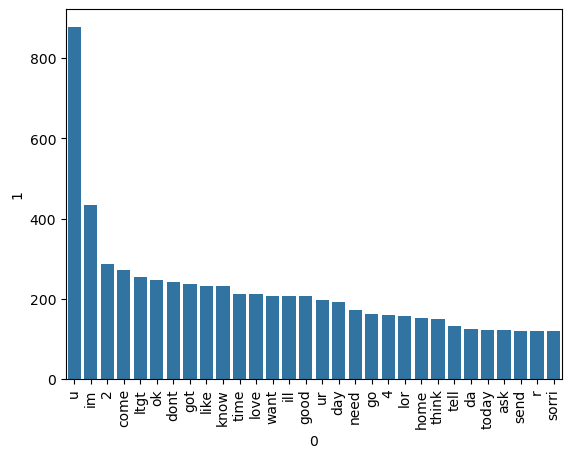

In [55]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical') #to organize 
plt.show()

# Model Building 

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
import pickle

In [57]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['transformed text'], df['target'], test_size=0.2, random_state=42)

In [58]:
# Create and fit the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=3000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [59]:
# Create and fit the Multinomial Naive Bayes model
mnb_model = MultinomialNB()
mnb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [60]:
# Save the trained model and vectorizer
with open('model.pkl', 'wb') as model_file:
    pickle.dump(mnb_model, model_file)

with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf_vectorizer, vectorizer_file)

In [61]:
# Make predictions on the test set
y_pred = mnb_model.predict(X_test_tfidf)


In [62]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [63]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.9700193423597679
Precision: 1.0
Confusion Matrix:
[[889   0]
 [ 31 114]]
